In [3]:
%matplotlib inline
import geopandas as gpd

In [4]:
data = gpd.read_file("TUN_adm/TUN_adm1.shp")

In [7]:
data.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,234,TUN,Tunisia,1,Ariana,Wilayat,Governorate,NaN,Al Aryiānah|L'Ariana|Tunis Ariana|Al Aryānah,"MULTIPOLYGON (((10.21097 37.09347, 10.21097 37..."
1,234,TUN,Tunisia,2,Béja,Wilayat,Governorate,NaN,Bājah|Béja,"POLYGON ((9.08780 37.15875, 9.08878 37.15524, ..."
2,234,TUN,Tunisia,3,Ben Arous (Tunis Sud),Wilayat,Governorate,NaN,Bin `Arūs|Ben Arous|Tunis Ben Arous,"POLYGON ((10.29486 36.81042, 10.29486 36.81014..."
3,234,TUN,Tunisia,4,Bizerte,Wilayat,Governorate,NaN,BanzartBanzart|Bensert|Binzart|Biserta|Bizerta,"MULTIPOLYGON (((10.23347 37.16264, 10.23347 37..."
4,234,TUN,Tunisia,5,Gabès,Wilayat,Governorate,NaN,Qābis|Gabās,"POLYGON ((9.67867 34.30668, 9.69478 34.30259, ..."


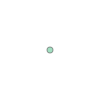

In [8]:
from shapely.geometry import Point

point = Point(2.2, 4.2)
point3D = Point(9.26, -2.456, 0.57)

point

In [9]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [10]:
print("Number of rows", len(data))

Number of rows 24


<Axes: >

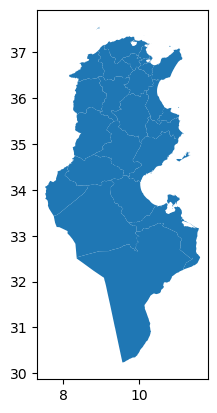

In [11]:
data.plot()

In [12]:
data["geometry"].head()

0    MULTIPOLYGON (((10.21097 37.09347, 10.21097 37...
1    POLYGON ((9.08780 37.15875, 9.08878 37.15524, ...
2    POLYGON ((10.29486 36.81042, 10.29486 36.81014...
3    MULTIPOLYGON (((10.23347 37.16264, 10.23347 37...
4    POLYGON ((9.67867 34.30668, 9.69478 34.30259, ...
Name: geometry, dtype: geometry

In [19]:
import fiona

In [20]:
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [21]:
from shapely.geometry import Polygon

# Coordinates of the Helsinki Senate square in decimal degrees
coordinates = [
    (24.950899, 60.169158),
    (24.953492, 60.169158),
    (24.953510, 60.170104),
    (24.950958, 60.169990),
]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

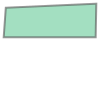

In [22]:
poly

In [23]:
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [24]:
newdata = gpd.GeoDataFrame(data=[poly], columns=["geometry"])

In [25]:
newdata

,geometry
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916..."


In [27]:
# Add a new column and insert data
newdata.at[0, "name"] = "Tunisia"

# Check the contents
newdata

,geometry,name
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916...",Tunisia


In [45]:
data =data.to_crs(epsg=3035)

<Axes: >

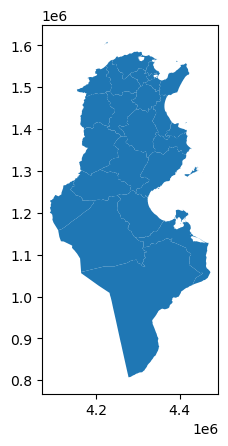

In [46]:
data.plot()

In [47]:
data.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,234,TUN,Tunisia,1,Ariana,Wilayat,Governorate,NaN,Al Aryiānah|L'Ariana|Tunis Ariana|Al Aryānah,"MULTIPOLYGON (((4339910.100 1557995.832, 43399..."
1,234,TUN,Tunisia,2,Béja,Wilayat,Governorate,NaN,Bājah|Béja,"POLYGON ((4239314.224 1565640.447, 4239397.834..."
2,234,TUN,Tunisia,3,Ben Arous (Tunis Sud),Wilayat,Governorate,NaN,Bin `Arūs|Ben Arous|Tunis Ben Arous,"POLYGON ((4347536.034 1526869.662, 4347536.138..."
3,234,TUN,Tunisia,4,Bizerte,Wilayat,Governorate,NaN,BanzartBanzart|Bensert|Binzart|Biserta|Bizerta,"MULTIPOLYGON (((4341906.381 1565615.558, 43419..."
4,234,TUN,Tunisia,5,Gabès,Wilayat,Governorate,NaN,Qābis|Gabās,"POLYGON ((4291075.341 1251860.498, 4292573.762..."


In [48]:
fp = gpd.datasets.get_path("naturalearth_lowres")
admin = gpd.read_file(fp)
admin.crs

C:\Users\SAV03\AppData\Local\Temp\ipykernel_18176\129782738.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  fp = gpd.datasets.get_path("naturalearth_lowres")


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich